Sources:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html
https://byuidatascience.github.io/python4ds/factors.html




##### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
random.seed(123)


# Importing the advertising data

In [2]:
ad_data = pd.read_csv("../../DATA/Advertising.csv")
ad_data = ad_data.drop('CompID', axis = 1)
ad_data.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


/Users/caiden/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

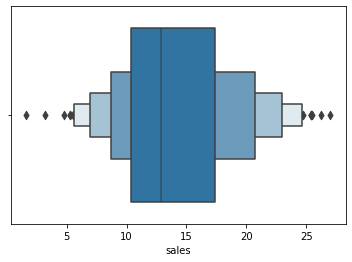

In [3]:
sns.boxenplot(ad_data['sales'])

/Users/caiden/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='TV'>

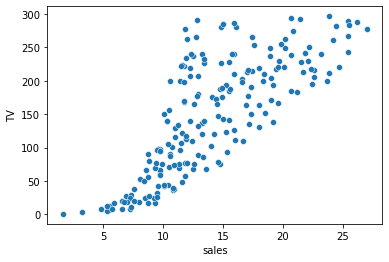

In [4]:
sns.scatterplot(ad_data['sales'],ad_data['TV'])

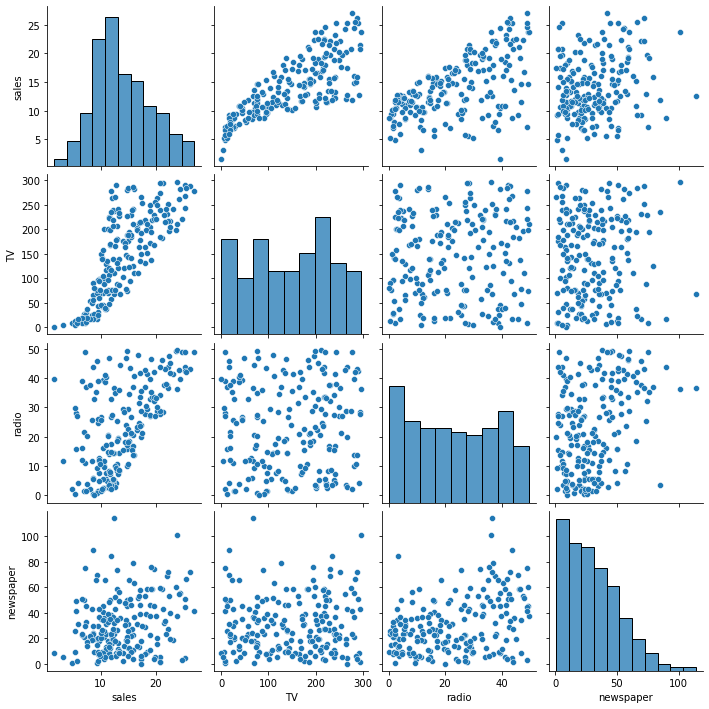

In [5]:
sns.pairplot(ad_data[['sales','TV','radio','newspaper']])

In [6]:
ad_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Importing the ride data

In [23]:
ride_data = pd.read_csv("../../DATA/daily.csv", parse_dates= ['ride_date'], index_col= 'ride_date')
ride_data.head()

,day_of_week,month,n_rides,n_riders,n_unique_stops,n_unique_routes
ride_date,,,,,,
2015-01-01,Thurs,Jan,58,37,44,14
2015-01-02,Fri,Jan,134,83,93,24
2015-01-03,Sat,Jan,145,84,100,25
2015-01-04,Sun,Jan,101,57,63,14
2015-01-05,Mon,Jan,182,117,109,23


##### Making box plots of riders by month

<AxesSubplot:xlabel='ride_date', ylabel='n_rides'>

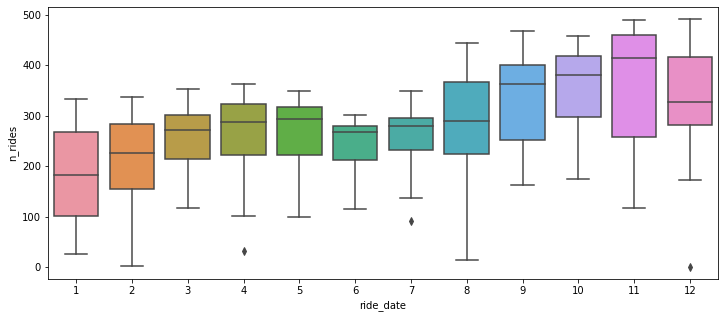

In [24]:
fig, ax = plt.subplots(figsize = (12,5))
sns.boxplot(x = ride_data.index.month, y = ride_data['n_rides'], ax = ax)

##### Box plots of riders by day of the week

<AxesSubplot:xlabel='ride_date', ylabel='n_rides'>

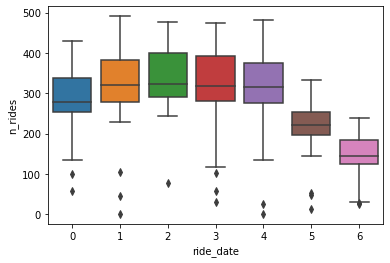

In [30]:
sns.boxplot(x = ride_data.index.day_of_week , y = ride_data['n_rides'])

# Importing the Ames data

In [31]:
ames_data = pd.read_csv("../../DATA/ames.csv")
ames_data.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


##### Making a histogram of the sale price

/Users/caiden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

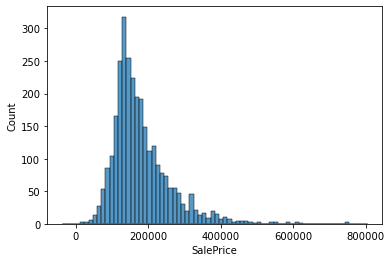

In [34]:
sns.histplot(ames_data['SalePrice'])

/Users/caiden/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

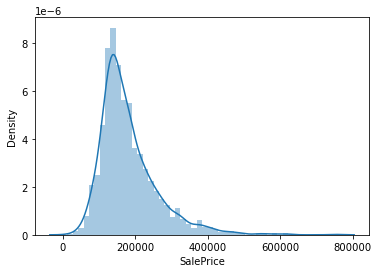

In [35]:
sns.distplot(ames_data['SalePrice'])

#### Histogram of price by exterior.1st

<AxesSubplot:xlabel='Exterior.1st', ylabel='SalePrice'>

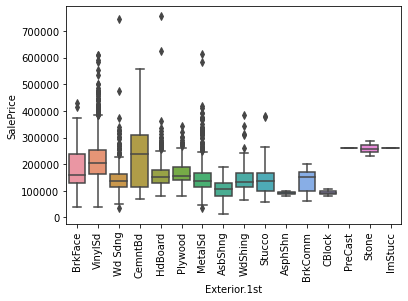

In [38]:
ax = plt.tick_params(axis= 'x', rotation = 90)
sns.boxplot(x = ames_data['Exterior.1st'], y = ames_data['SalePrice'], ax = ax)

##### Histogram of neigborhood by sale price

##### Scatter plot of Gr.living.area by sale price

# Importing the vehicles data

In [32]:
vehicles_data = pd.read_csv('../../DATA/vehicles.csv')
vehicles_data.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


##### Histogram of co2 emmmisions

<AxesSubplot:xlabel='co2emissions', ylabel='Count'>

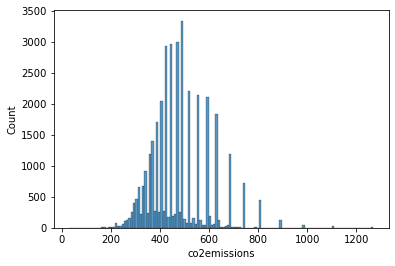

In [39]:
sns.histplot(vehicles_data['co2emissions'])